In [111]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import warnings

plt.rc("font", family=["Helvetica", "Arial"]) # skifter skrifttype
plt.rc("axes", labelsize=22)   # skriftstørrelse af `xlabel` og `ylabel`
plt.rc("xtick", labelsize=22, top=True, direction="out")
plt.rc("ytick", labelsize=22, right=True, direction="out")
plt.rc("axes", titlesize=22)
plt.rc("legend", fontsize=22)
plt.rcParams["figure.figsize"] = (12, 8)

In [112]:
def loadEventSummary(filenames, vector_length=7):
    n_truth_vtxs = []
    n_ntuple_reco_vtxs  = []
    n_reco_vtxs  = []
    
    all_reco_vtxs = []
    for filename in filenames:
        with open(filename, 'r') as fp:
            n_truth_vtx, n_ntuple_reco, n_reco_vtx = [int(i) for i in fp.readline().split()]
            n_truth_vtxs.append(n_truth_vtx)            
            n_ntuple_reco_vtxs.append(n_ntuple_reco)            
            n_reco_vtxs.append(n_reco_vtx)            
            
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            vtxs_in_event = np.loadtxt(filename, skiprows=1)
            # print(vtxs_in_event)
            # print(vtxs_in_event)
            # print(vtxs_in_event.shape)
            # if len(vtxs_in_event) == 7:
            # all_reco_vtxs = np.vstack((all_reco_vtxs, vtxs_in_event))
            all_reco_vtxs.append(vtxs_in_event)

    return np.array(n_truth_vtxs), np.array(n_ntuple_reco_vtxs), np.array(n_reco_vtxs), all_reco_vtxs

In [113]:
n_truth_vtx, n_ntuple_reco_vtx, IVF_n_reco_vtx, IVF_vtxs =  loadEventSummary(np.sort(glob.glob('ntuple_check_goodRecoVtxTracks/*IVF.txt')))
_, _, AMVF_n_reco_vtx, AMVF_vtxs =                          loadEventSummary(np.sort(glob.glob('ntuple_check_goodRecoVtxTracks/*AMVF.txt')))
_, _, _, truth_vtxs =                                       loadEventSummary(np.sort(glob.glob('ntuple_check_goodRecoVtxTracks/*truth.txt')), 4)
_, _, _, reco_vtxs =                                        loadEventSummary(np.sort(glob.glob('ntuple_check_goodRecoVtxTracks/*ntuple_reco.txt')), 4)

In [124]:
def flatten_array(array, size=7):
    res = np.empty(size)
    for sub in array:
        res = np.vstack((res, sub))
    return res

In [131]:
IVF_vtxs_flat = flatten_array(IVF_vtxs)
AMVF_vtxs_flat = flatten_array(AMVF_vtxs)
reco_vtxs_flat = flatten_array(reco_vtxs, 4)

Text(0.5, 0, 'Number of reco vtxs')

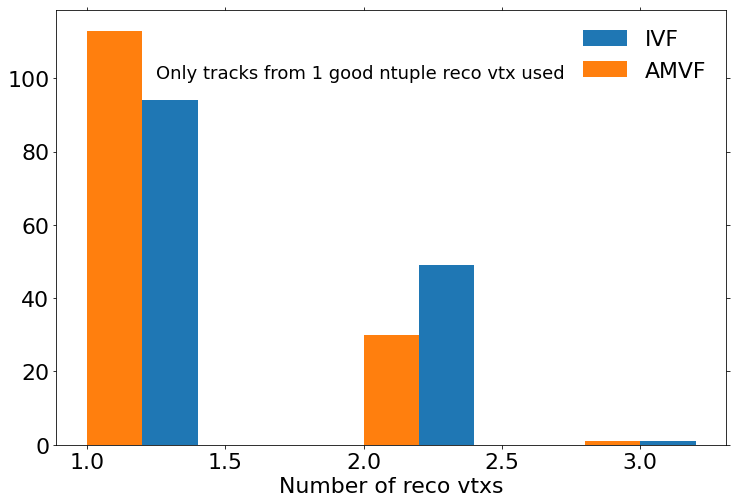

In [164]:
_ = plt.hist(IVF_n_reco_vtx+0.2, label='IVF')
_ = plt.hist(AMVF_n_reco_vtx   , label='AMVF')

plt.text(1.25, 100, 'Only tracks from 1 good ntuple reco vtx used', fontsize=18)
plt.legend(frameon=False)
plt.xlabel('Number of reco vtxs')

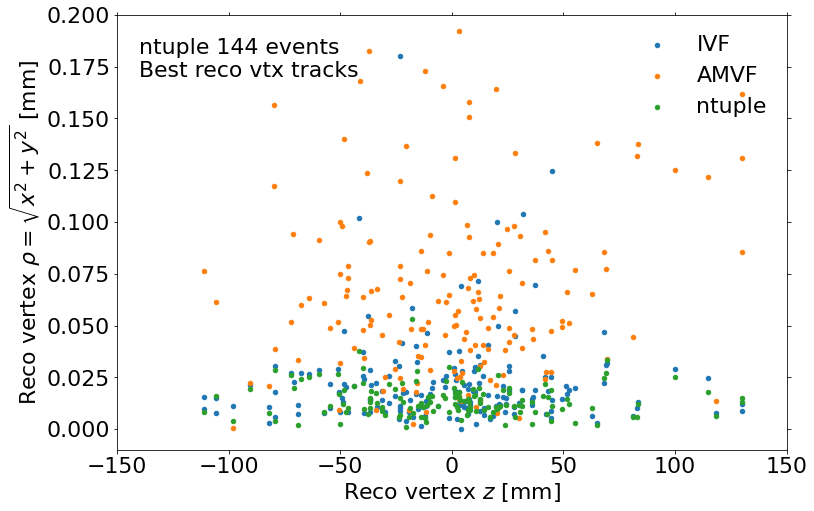

In [155]:
plt.scatter(IVF_vtxs_flat[:,2], (IVF_vtxs_flat[:,0]**2 + IVF_vtxs_flat[:,1]**2)**0.5, s=20, label='IVF')
plt.scatter(AMVF_vtxs_flat[:,2], (AMVF_vtxs_flat[:,0]**2 + AMVF_vtxs_flat[:,1]**2)**0.5, s=20, label='AMVF')
for event in range(144):
    plt.scatter(reco_vtxs[event][0,2], (reco_vtxs[event][0,0]**2 + reco_vtxs[event][0,1]**2)**0.5, s=20, label='ntuple' if event==0 else '', c='C2')

plt.text(-140, 0.17, "ntuple 144 events\nBest reco vtx tracks", fontsize=22)
plt.xlabel('Reco vertex $z$ [mm]')
plt.ylabel('Reco vertex $\\rho=\\sqrt{x^2 + y^2}$ [mm]')
plt.xlim(-150, 150)
plt.ylim(-0.01, 0.2)

plt.legend(frameon=False)

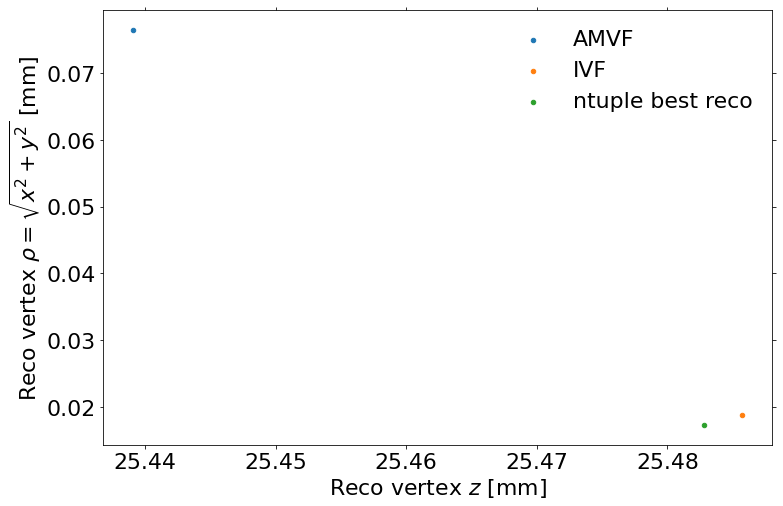

In [140]:
event=0


# plt.scatter(truth_vtxs[truth_start_idx:truth_end_idx,2], (truth_vtxs[truth_start_idx:truth_end_idx,0]**2 + truth_vtxs[truth_start_idx:truth_end_idx,1]**2)**0.5, s=20, label='Truth HS')
if AMVF_n_reco_vtx[event] == 1:
    plt.scatter(AMVF_vtxs[event][2], (AMVF_vtxs[event][0]**2 + AMVF_vtxs[event][1]**2)**0.5, s=20, label='AMVF')
else:
    plt.scatter(AMVF_vtxs[event][:,2], (AMVF_vtxs[event][:,0]**2 + AMVF_vtxs[event][:,1]**2)**0.5, s=20, label='AMVF')
if IVF_n_reco_vtx[event] == 1:
    plt.scatter(IVF_vtxs[event][2], (IVF_vtxs[event][0]**2 + IVF_vtxs[event][1]**2)**0.5, s=20, label='IVF')
else:
    plt.scatter(IVF_vtxs[event][:,2], (IVF_vtxs[event][:,0]**2 + IVF_vtxs[event][:,1]**2)**0.5, s=20, label='IVF')
    
plt.scatter(reco_vtxs[event][0,2], (reco_vtxs[event][0,0]**2 + reco_vtxs[event][0,1]**2)**0.5, s=20, label='ntuple best reco')



# plt.text(-90, 0.27, "ntuple event # {}".format(event), fontsize=22)
plt.xlabel('Reco vertex $z$ [mm]')
plt.ylabel('Reco vertex $\\rho=\\sqrt{x^2 + y^2}$ [mm]')
# plt.xlim(-150, 150)
# plt.ylim(-0.01, 0.3)

plt.legend(frameon=False, loc='upper right')

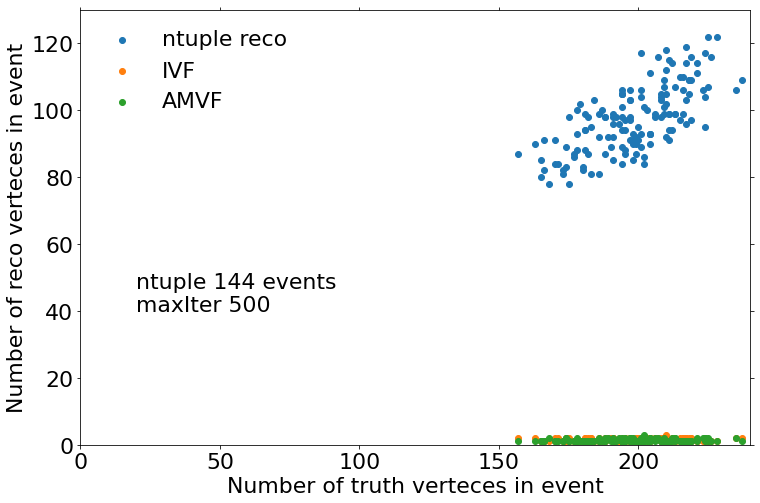

In [6]:
plt.scatter(n_truth_vtx, n_ntuple_reco_vtx , label='ntuple reco')
plt.scatter(n_truth_vtx, IVF_n_reco_vtx , label='IVF')
plt.scatter(n_truth_vtx, AMVF_n_reco_vtx, label='AMVF')
plt.text(20, 40, "ntuple 144 events\nmaxIter 500", fontsize=22)

plt.xlabel('Number of truth verteces in event')
plt.ylabel('Number of reco verteces in event')
plt.xlim(0, 240)
plt.ylim(0, 130)
plt.legend(frameon=False)

Text(0.5, 0, 'Vertex reconstruction efficiency')

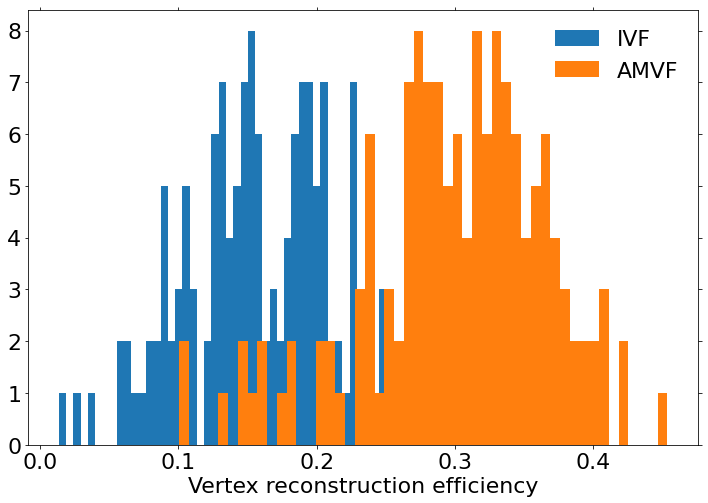

In [50]:
_ = plt.hist(IVF_n_reco_vtx/n_truth_vtx,   bins=50, label="IVF")
_ = plt.hist(AMVF_n_reco_vtx/n_truth_vtx, bins=50, label="AMVF")

plt.legend(frameon=False)
plt.xlabel("Vertex reconstruction efficiency")

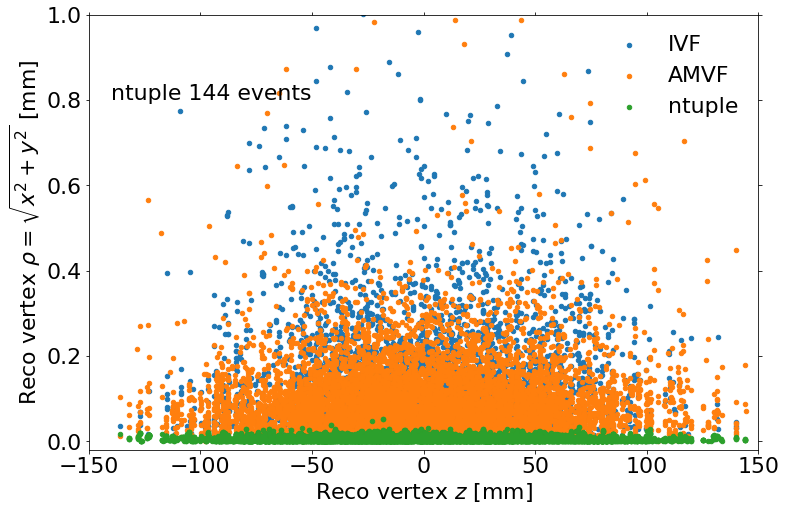

In [51]:
plt.scatter(IVF_vtxs[:,2], (IVF_vtxs[:,0]**2 + IVF_vtxs[:,1]**2)**0.5, s=20, label='IVF')
plt.scatter(AMVF_vtxs[:,2], (AMVF_vtxs[:,0]**2 + AMVF_vtxs[:,1]**2)**0.5, s=20, label='AMVF')
plt.scatter(reco_vtxs[:,2], (reco_vtxs[:,0]**2 + reco_vtxs[:,1]**2)**0.5, s=20, label='ntuple')

plt.text(-140, 0.8, "ntuple 144 events", fontsize=22)
plt.xlabel('Reco vertex $z$ [mm]')
plt.ylabel('Reco vertex $\\rho=\\sqrt{x^2 + y^2}$ [mm]')
plt.xlim(-150, 150)
plt.ylim(-0.02, 1)

plt.legend(frameon=False)

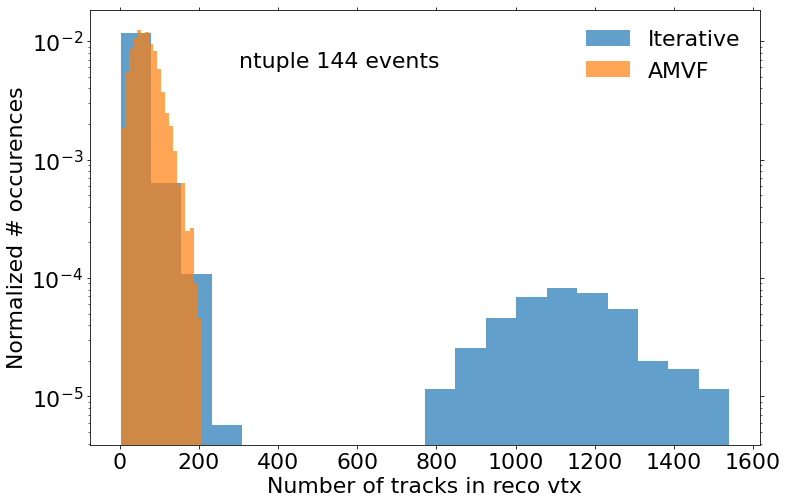

In [52]:
plt.hist(IVF_vtxs[:,4], density=True, bins=20, alpha=0.7, label='Iterative')
plt.hist(AMVF_vtxs[:,4], density=True,      bins=20, alpha=0.7, label='AMVF')

plt.legend(frameon=False)
plt.text(300, 0.006, "ntuple 144 events", fontsize=22)
plt.xlabel('Number of tracks in reco vtx')
plt.ylabel('Normalized # occurences')
plt.yscale('log')

Text(0, 0.5, 'Normalized # occurences')

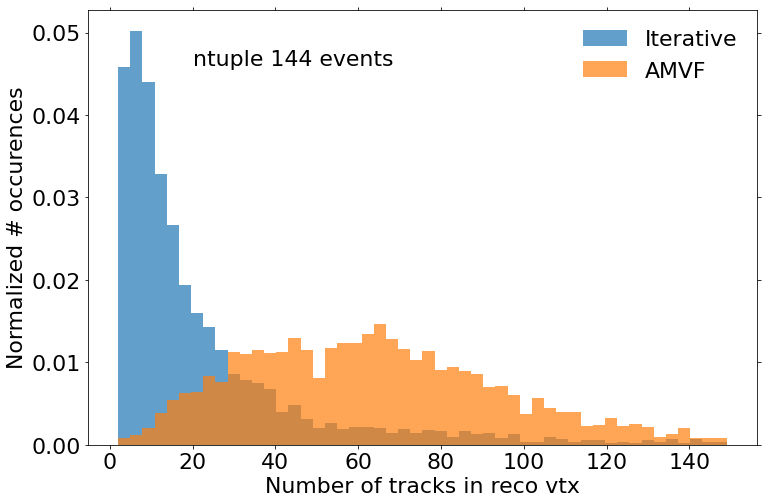

In [53]:
maxMulti = 150
iterative_idx = IVF_vtxs[:,4] < maxMulti 
AMVF_idx =      AMVF_vtxs[:,4] < maxMulti 

plt.hist(IVF_vtxs[iterative_idx,4], density=True, bins=50, alpha=0.7, label='Iterative')
plt.hist(AMVF_vtxs[AMVF_idx,4], density=True,           bins=50, alpha=0.7, label='AMVF')

plt.text(20, 0.046, "ntuple 144 events", fontsize=22)

plt.legend(frameon=False)
plt.xlabel('Number of tracks in reco vtx')
plt.ylabel('Normalized # occurences')

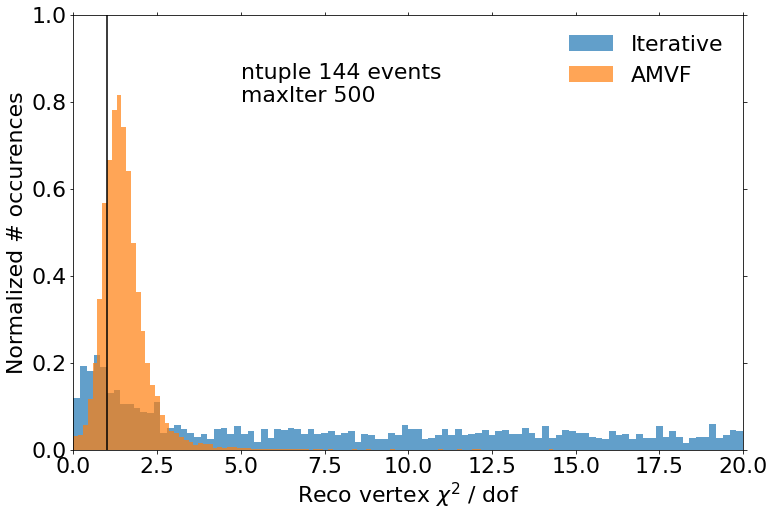

In [63]:
maxRedChi2 = 20
IVF_redchi2 = IVF_vtxs[:,5] / IVF_vtxs[:,6]
AMVF_redchi2 = AMVF_vtxs[:,5] / AMVF_vtxs[:,6]

IVFidx =  np.logical_and(IVF_redchi2 > 0, IVF_redchi2 < maxRedChi2)
AMVFidx = np.logical_and(AMVF_redchi2 > 0, AMVF_redchi2 < maxRedChi2)

_ = plt.hist(IVF_redchi2[IVFidx],   bins=100, label='Iterative', alpha=0.7, density=True)
_ = plt.hist(AMVF_redchi2[AMVFidx], bins=100, label='AMVF'   ,   alpha=0.7, density=True)
plt.text(5, 0.8, "ntuple 144 events\nmaxIter 500", fontsize=22)

plt.vlines(1, 0, 700, 'k')
plt.xlabel('Reco vertex $\\chi^2$ / dof')
plt.ylabel('Normalized # occurences')

plt.xlim(0, maxRedChi2)
plt.ylim(0, 1)
plt.legend(frameon=False)

Text(0, 0.5, '$\\chi^2$ / dof')

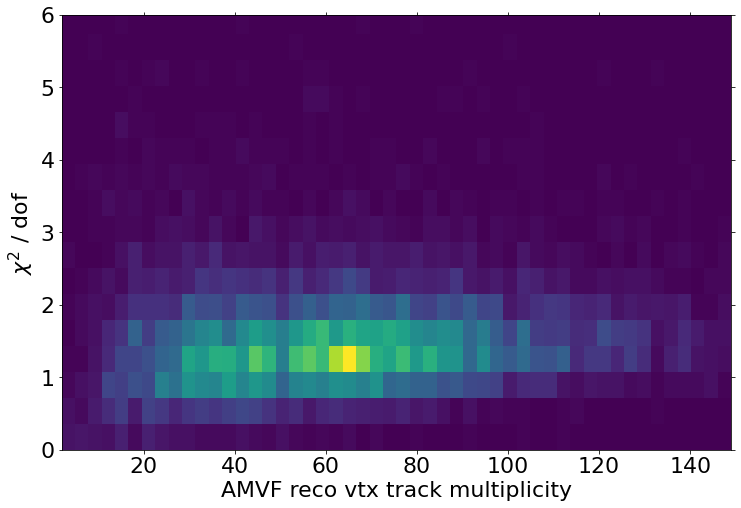

In [61]:
idx2d = np.logical_and(AMVFidx, AMVF_vtxs[:,4] < 150)

_ = plt.hist2d(AMVF_vtxs[idx2d,4], AMVF_redchi2[idx2d], bins=(50, 40))

plt.ylim(0, 6)
plt.xlabel('AMVF reco vtx track multiplicity')
plt.ylabel('$\\chi^2$ / dof')

In [19]:
np.max(IVF_vtxs[:,3]), np.max(AMVF_vtxs[:,3])

(54.2, 54.2)

Text(0, 0.5, 'Normalized # occurences')

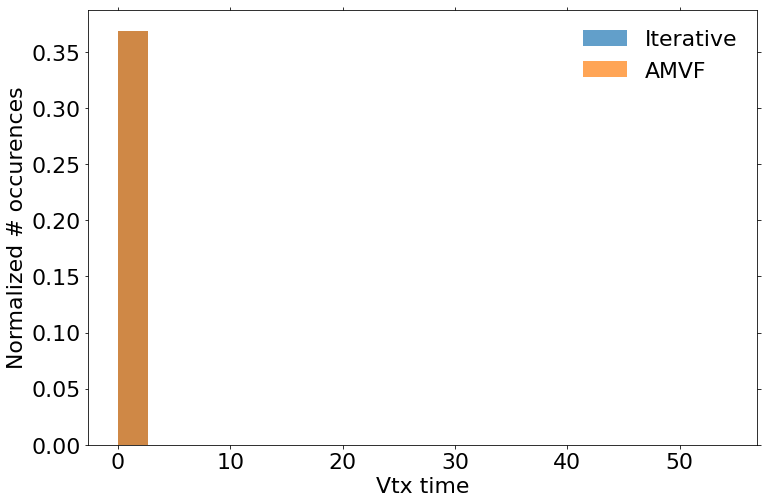

In [18]:
plt.hist(IVF_vtxs[:,3], density=True, bins=20, alpha=0.7, label='Iterative')
plt.hist(AMVF_vtxs[:,3], density=True,      bins=20, alpha=0.7, label='AMVF')

plt.legend(frameon=False)
plt.xlabel('Vtx time')
plt.ylabel('Normalized # occurences')